In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

# Read in all files

## GPS

In [2]:
gps = pd.read_csv("gps_fixed.csv")
gps["Timestamp"] = gps["Timestamp"].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
gps

,Timestamp,id,lat,long,hour,time,date,is_weekend,CurrentEmploymentType,CurrentEmploymentTitle,FullName,stop
0,2014-01-06 07:20:01,1.0,36.066457,24.882582,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,0
1,2014-01-06 07:20:03,1.0,36.066344,24.882589,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,0
2,2014-01-06 07:20:06,1.0,36.066147,24.882584,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,0
3,2014-01-06 07:20:07,1.0,36.066130,24.882576,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,0
4,2014-01-06 07:20:10,1.0,36.065955,24.882615,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,0
...,...,...,...,...,...,...,...,...,...,...,...,...
685164,2014-01-17 17:20:57,107.0,36.048401,24.879569,17.0,Evening,2014-01-17,False,Facilities,Truck Driver,Cecilia Morluniau,0
685165,2014-01-17 17:20:58,107.0,36.048320,24.879573,17.0,Evening,2014-01-17,False,Facilities,Truck Driver,Cecilia Morluniau,0
685166,2014-01-17 17:20:59,107.0,36.048228,24.879566,17.0,Evening,2014-01-17,False,Facilities,Truck Driver,Cecilia Morluniau,0
685167,2014-01-17 17:21:00,107.0,36.048136,24.879569,17.0,Evening,2014-01-17,False,Facilities,Truck Driver,Cecilia Morluniau,0


## Stops Only

In [3]:
gpsStops=pd.read_csv('gps_stopsOnly.csv') 
gpsStops.head()

,Timestamp,id,lat,long,hour,time,date,is_weekend,CurrentEmploymentType,CurrentEmploymentTitle,FullName,stop
0,2014-01-06 07:22:04,1.0,36.063658,24.885866,7.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,1
1,2014-01-06 08:04:09,1.0,36.048029,24.879575,8.0,Morning,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,1
2,2014-01-06 12:26:27,1.0,36.076663,24.857591,12.0,Lunch,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,1
3,2014-01-06 13:34:27,1.0,36.048029,24.879572,13.0,Lunch,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,1
4,2014-01-06 17:48:03,1.0,36.066487,24.882602,17.0,Evening,2014-01-06,False,Information Technology,IT Helpdesk,Lucas Alcazar,1


In [4]:
from sklearn.preprocessing import (OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer)
categoricalCol=['time', 'date', 'CurrentEmploymentType']
le = LabelEncoder()
X=gpsStops.drop(columns=['Timestamp', 'CurrentEmploymentTitle', 'FullName'])
X[categoricalCol]=X[categoricalCol].apply(le.fit_transform)


In [5]:
# X=gpsStops[['lat', 'long']].copy()
# X=X[['long', 'lat']].to_numpy()
# X

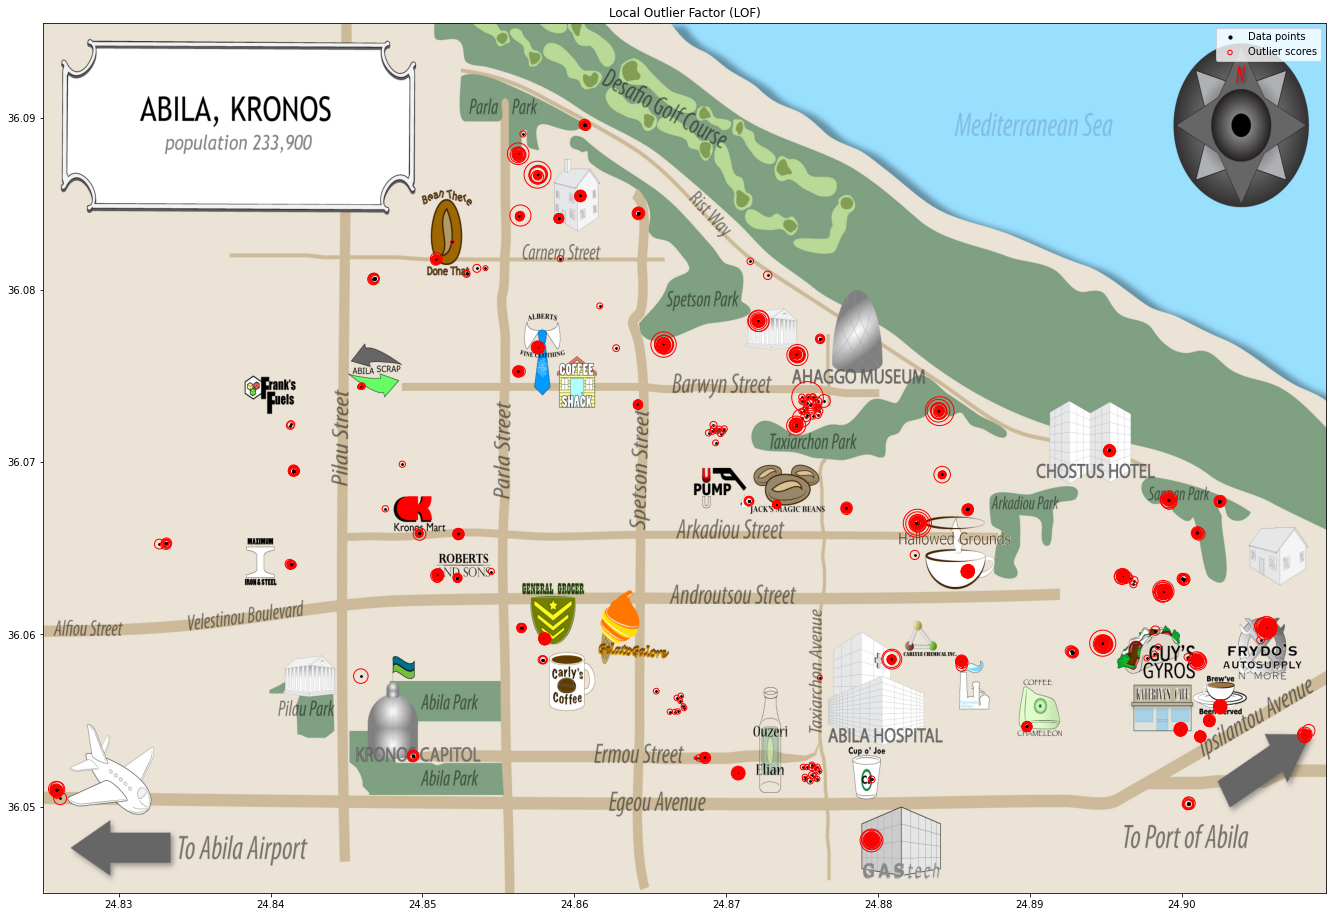

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
figsize = (23,16)
plt.figure(figsize = figsize)
img = plt.imread("map-tourist.jpg")
# X=gpsStops[['lat', 'long']].copy()
# X=X[['long', 'lat']].to_numpy()
plt.imshow(img, extent=[24.825, 24.9095, 36.045, 36.0955], aspect='auto')
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X.long, X.lat, color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X.long, X.lat,
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
# plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper right")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [7]:
gpsStops['outScore']=X_scores
gpsStops[gpsStops['outScore']<-1.5]

,Timestamp,id,lat,long,hour,time,date,is_weekend,CurrentEmploymentType,CurrentEmploymentTitle,FullName,stop,outScore
10,2014-01-07 01:14:02,1.0,36.066439,24.882594,1.0,MidNight,2014-01-07,False,Information Technology,IT Helpdesk,Lucas Alcazar,1,-1.946148
29,2014-01-09 03:20:01,1.0,36.066457,24.882611,3.0,Morning,2014-01-09,False,Information Technology,IT Helpdesk,Lucas Alcazar,1,-1.504660
75,2014-01-16 00:13:02,1.0,36.066453,24.882588,0.0,MidNight,2014-01-16,False,Information Technology,IT Helpdesk,Lucas Alcazar,1,-2.396285
201,2014-01-11 00:29:45,3.0,36.086697,24.857579,0.0,MidNight,2014-01-11,True,Engineering,Engineer,Felix Balas,1,-2.276082
217,2014-01-14 21:00:52,3.0,36.086727,24.857658,21.0,Night,2014-01-14,False,Engineering,Engineer,Felix Balas,1,-1.500639
218,2014-01-14 21:09:01,3.0,36.086674,24.857619,21.0,Night,2014-01-14,False,Engineering,Engineer,Felix Balas,1,-1.500639
724,2014-01-18 23:57:01,9.0,36.084325,24.856454,23.0,Night,2014-01-18,True,Engineering,Drill Technician,Axel Calzas,1,-1.756482
809,2014-01-16 21:05:45,10.0,36.076836,24.865902,21.0,Night,2014-01-16,False,Executive,SVP/CIO,Ada Campo-Corrente,1,-1.564130
1153,2014-01-07 03:35:10,15.0,36.076826,24.865922,3.0,Morning,2014-01-07,False,Security,Site Control,Loreto Bodrogi,1,-1.586563
1174,2014-01-09 03:32:43,15.0,36.072125,24.874606,3.0,Morning,2014-01-09,False,Security,Site Control,Loreto Bodrogi,1,-1.607752


## Card Data

In [8]:
card_data= pd.read_csv("card_data.csv")
card_data.head()

,timestamp,location,price_x,timestampFull,cc,cents,price_y,loyalty,FullName,CarID,CurrentEmploymentType,CurrentEmploymentTitle
0,2014-01-06,Brew've Been Served,11.34,2014-01-06 07:28:00,1.0,0.34,11.34,1.0,Edvard Vann,34.0,Security,Perimeter Control
1,2014-01-06,Hippokampos,13.26,2014-01-06 13:23:00,1.0,0.26,13.26,1.0,Edvard Vann,34.0,Security,Perimeter Control
2,2014-01-07,Brew've Been Served,7.09,2014-01-07 07:33:00,1.0,0.09,NaN,0.0,Edvard Vann,34.0,Security,Perimeter Control
3,2014-01-07,Kalami Kafenion,18.06,2014-01-07 13:33:00,1.0,0.06,18.06,1.0,Edvard Vann,34.0,Security,Perimeter Control
4,2014-01-07,Guy's Gyros,26.82,2014-01-07 20:10:00,1.0,0.82,NaN,0.0,Edvard Vann,34.0,Security,Perimeter Control


In [9]:
#in the future we would like to continue exploring ML techniques to further the pattern detection